# dataset: https://www.kaggle.com/datasets/andrewmvd/udemy-courses

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('udemy_courses.csv', parse_dates=['published_timestamp'])

In [3]:
data.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [4]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [5]:
# Present row/column counts for dataframe

print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  3678
Number of columns:  12


In [6]:
# Display relevant info about dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [7]:
# Check for Nulls

data.isnull().values.any()

False

In [8]:
# Check for duplicates and drop

data.duplicated().any()

True

In [9]:
data = data.drop_duplicates()

In [10]:
# Find number of course per subject

data['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

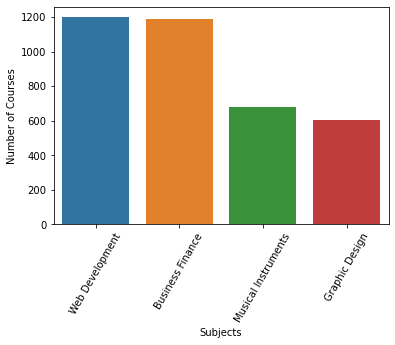

In [121]:
order = order = data.groupby('subject').size().sort_values().index[::-1]
sns.countplot(x=data['subject'], order=order)
plt.xlabel("Subjects")
plt.ylabel("Number of Courses")
plt.xticks(rotation=60)
plt.show()

In [12]:
# Find number of courses by level 

data['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

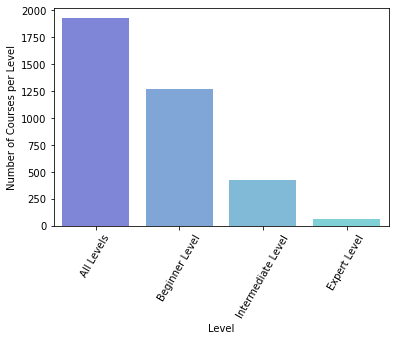

In [123]:
order = order = data.groupby('level').size().sort_values().index[::-1]
sns.countplot(x=data['level'], order=order, palette=['#7279e5',"#72a4e5", "#72bfe5", "#72dde5"])
plt.xlabel("Level")
plt.ylabel("Number of Courses per Level")
plt.xticks(rotation=60)
plt.show()

In [14]:
# Display count of Paid versus Free courses

data['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

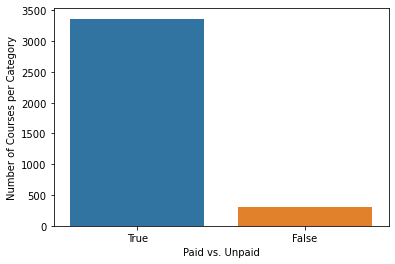

In [125]:
order = data.groupby('is_paid').size().sort_values().index[::-1]
sns.countplot(x=data['is_paid'], order=order)
plt.xlabel("Paid vs. Unpaid")
plt.ylabel("Number of Courses per Category")
plt.show()

In [16]:
# Find which course type (free or paid) has more lectures on average

data.groupby(['is_paid']).mean()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


In [17]:
# ^^ The average number of lecture courses in paid (true) courses is 41, compared to 21 in unpaid courses

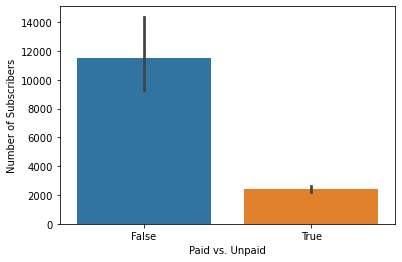

In [126]:
# Find which course type (free or paid) has has the most subscribers
order = data.groupby('is_paid').size().sort_values().index[::-1]
sns.barplot(x="is_paid", y="num_subscribers", data=data)
plt.xlabel("Paid vs. Unpaid")
plt.ylabel("Number of Subscribers")
plt.show()

In [ ]:
# ^^ The above graph indicates that free courses (x| False) have the most subscribers

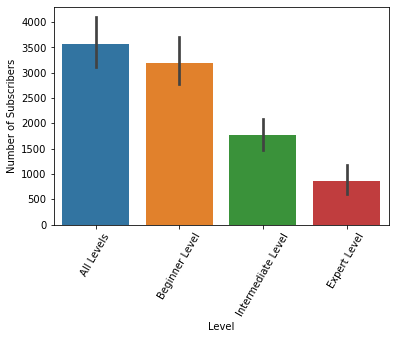

In [119]:
# Find which course level has the most subscribers

order = order = data.groupby('level').size().sort_values().index[::-1]
sns.barplot(x="level", y="num_subscribers", data=data, order=order)
plt.xlabel("Level")
plt.ylabel("Number of Subscribers")
plt.xticks(rotation=60)
plt.show()

In [27]:
# Find the most popular course

data[data['num_subscribers'].max() == data['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [32]:
# Display the 10 most popular courses, based on subscription numbers

top_ten = data.sort_values(by="num_subscribers", ascending=False).head(10)
top_ten

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10 15:19:29+00:00,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development


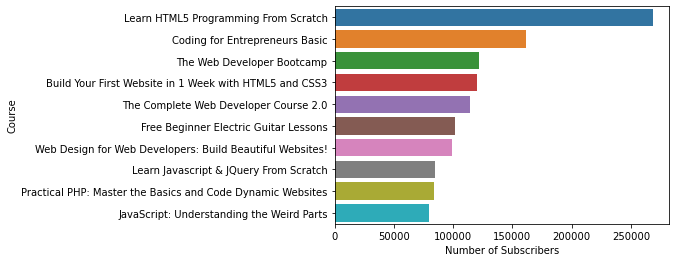

In [37]:
sns.barplot(x="num_subscribers", y="course_title", data=top_ten)
plt.xlabel("Number of Subscribers")
plt.ylabel("Course")
plt.show()

In [39]:
# Find course with highest number of reviews

data.sort_values(by="num_reviews", ascending=False).head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development


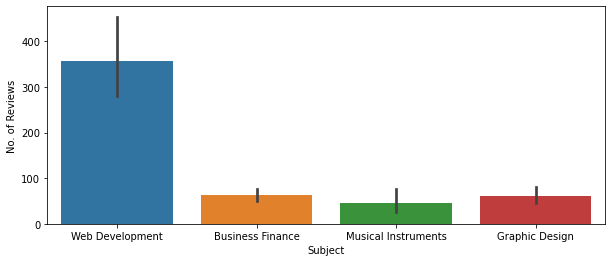

In [127]:
order = order = data.groupby('subject').size().sort_values().index[::-1]
plt.figure(figsize=(10,4))
sns.barplot(x="subject", y="num_reviews", data=data, order=order)
plt.xlabel("Subject")
plt.ylabel("No. of Reviews")
plt.show()

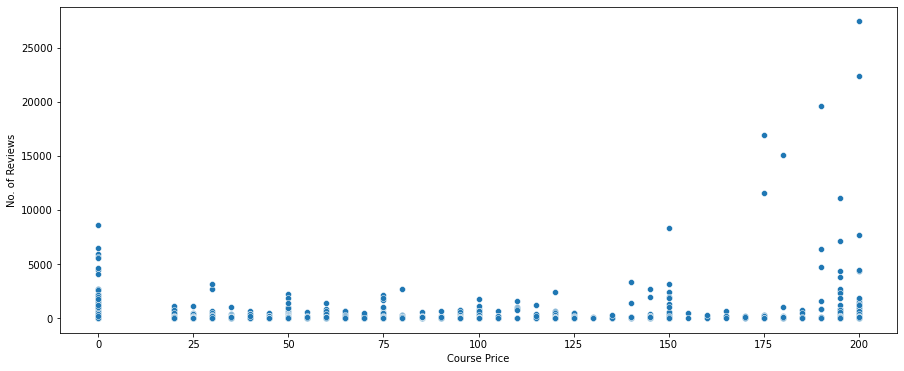

In [48]:
# Does price affect number of reviews?

plt.figure(figsize=(15,6))
sns.scatterplot(x="price", y="num_reviews", data=data)
plt.xlabel("Course Price")
plt.ylabel("No. of Reviews")
plt.show()

In [49]:
# ^^Above scatterplot indicates that higher priced courses will generate more reviews. 
# Free courses will generate slightly more reviews thank courses between $20 and $140.

In [54]:
# Find total number of courses related to Python

len(data[data['course_title'].str.contains("python", case=False)])

29

In [63]:
# Display the 10 most popular Python Courses based on subscriber count

df_python = data[data['course_title'].str.contains("python", case=False)].\
sort_values(by="num_subscribers", ascending=False).head(10)
df_python

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development
2570,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45.0,2013-04-08 00:46:14+00:00,Web Development
2528,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5,2015-02-09 15:37:56+00:00,Web Development
3200,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5,2017-02-24 18:40:55+00:00,Web Development
3507,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2.0,2015-06-09 19:51:50+00:00,Web Development
2553,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11.0,2016-09-26 15:08:29+00:00,Web Development
3138,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16.0,2015-11-08 20:57:35+00:00,Web Development
3197,76052,Try Django 1.9 | Build a Blog and Learn Python...,https://www.udemy.com/try-django/,True,50,7407,172,147,All Levels,20.0,2014-03-04 07:12:21+00:00,Web Development
2681,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5.0,2015-06-14 18:18:57+00:00,Web Development
3203,970600,REST APIs with Flask and Python,https://www.udemy.com/rest-api-flask-and-python/,True,110,5151,737,115,Intermediate Level,12.5,2016-11-06 19:00:38+00:00,Web Development


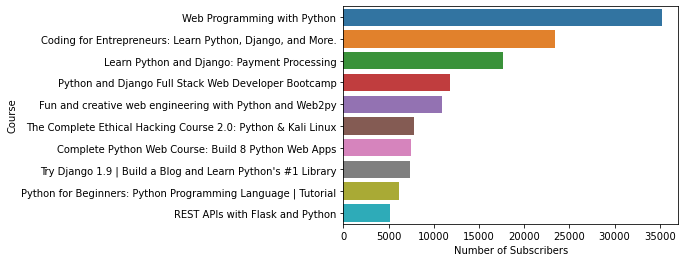

In [65]:
sns.barplot(x="num_subscribers", y="course_title", data=df_python)
plt.xlabel("Number of Subscribers")
plt.ylabel("Course")
plt.show()

In [96]:
# What year had the largest number of new courses posted?

# 1. Create 'Year' column
data['Year'] = data['published_timestamp'].dt.year

# 2. Find count of course_id's per year
data.groupby('Year')['course_id'].count()

Year
2011       5
2012      45
2013     201
2014     490
2015    1014
2016    1204
2017     713
Name: course_id, dtype: int64

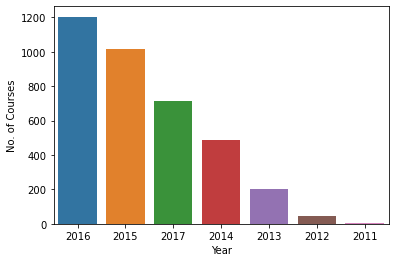

In [118]:
# 3. Graph table output

order = data.groupby('Year').size().sort_values().index[::-1]

sns.countplot(x='Year', data=data, order=order)
plt.xlabel("Year")
plt.ylabel("No. of Courses")
plt.show()

In [128]:
# Display course subjects by (1) Caategory, and (2) Year

data.groupby('Year')['subject'].value_counts()

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64